# Lab 8

## Task 3

### Simple linear regression

1. Download data file ‘insurance.csv’ from GCULearn.

2. Load the ‘insurance.csv dataset into Python as a Pandas DataFrame; and print
summary statistics on each attribute

In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt

# load the dataset
dataset = read_csv('../lab8/insurance.csv', header=None)

# print the summary statistics on each attributes
print(dataset.describe())

                0           1
count   63.000000   63.000000
mean    22.904762   98.187302
std     23.351946   87.327553
min      0.000000    0.000000
25%      7.500000   38.850000
50%     14.000000   73.400000
75%     29.000000  140.000000
max    124.000000  422.200000


3. Check the duplication

In [3]:
# Rows containing duplicate data
duplicate_rows_df = dataset[dataset.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 2)


No duplication in this data, no further processes

4. Specify the input variable (x) and the target variable (y), and plot the data

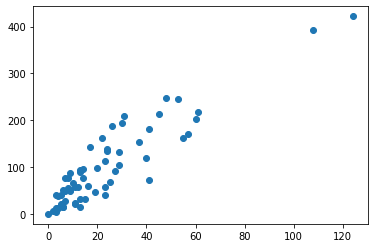

In [4]:
# Commented out IPython magic to ensure Python compatibility.
# specify the input variable (x) and the target variable (y)
x = dataset[0]
y = dataset[1]

# plot the data
# the following line is not needed in Spyder
# %matplotlib inline
plt.scatter(x,y)

5. In simple linear regression, the equation for the best fitting regression line is:

In order to estimate b0 and b1, we can define the following functions:

In [5]:
## Define the funcitons to be used in the coefficient calculation

# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(s - mean)**2 for s in values])

# Calculate covariance between x and y
def covariance(s, mean_s, t, mean_t):
    covar = 0.0
    for i in range(len(s)):
        covar += (s[i] - mean_s) * (t[i] - mean_t)
    return covar

So coefficients in the best regression line can be estimated using:

In [6]:
# Function to calculate coefficients
def coefficients(in_var, target):
    x_mean, y_mean = mean(in_var), mean(target)
    b1 = covariance(in_var, x_mean, target, y_mean) / variance(in_var, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

6. Using the defined ‘coefficients’ function to estimate the best regression in
between the two variables in the ‘insurance’ dataset. 

In [7]:
# estimate the best fitting regression line
b0, b1 = coefficients(x, y)

print('Coefficients: b0=%.3f, b1=%.3f' % (b0, b1))
print('The best regrssion line is: y = %.2f + %.2f * x' % (b0, b1))

Coefficients: b0=19.994, b1=3.414
The best regrssion line is: y = 19.99 + 3.41 * x


7. Plot the best fitting line

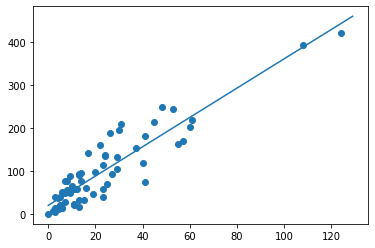

In [8]:
# in irder to plot the regression line, calculate points on the line
x1 = range(130)
y1 = []
for i in x1:
    #x1.append(i)
    y1.append(b0 + b1*i)

# plot the regression line
plt.plot(x1,y1)
# plot the dataset in the same figure
plt.scatter(x,y)

8. Once the coefficients are estimated, you can use them to make predictions (as
shown in equation 1 above).

For example, assuming in a new instance, the input variable is 85.72, and you
can predict the value of corresponding target variable:

the new instacnce is: 85.72, 312.63


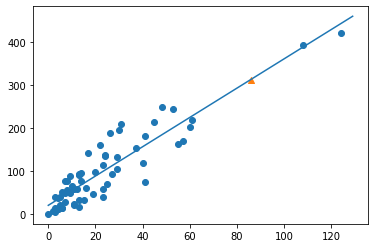

In [9]:
# assuming in a new instance: the input variable is 85.72
x_k = 85.72

# predict the value of target varible using the regression model
y_k = b0 + b1 * x_k
print('the new instacnce is: %.2f, %.2f' % (x_k, y_k))

# plot the regression line and instances in the original dataset
plt.plot(x1,y1)
plt.scatter(x,y)

# plot the new instance in the figure as a triangle
plt.scatter(x_k, y_k, marker='^')

9. Try to predict the target variable when the input variable has different value, e.g.
42.16, 65.3, etc.

In [10]:
x01 = 46.12
x02 = 65.3

# predict the value of target variable using the regression model
y01 = b0 + b1 * x01
print('the new instacnce is: %.2f, %.2f' % (x01, y01))

y02 = b0 + b1 * x02
print('the new instacnce is: %.2f, %.2f' % (x02, y02))

the new instacnce is: 46.12, 177.44
the new instacnce is: 65.30, 242.92
